# Chapter 5.3 - Linear Methods for Regression

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import sklearn.linear_model as lm
import sklearn.metrics as metrics

#import warnings
#warnings.filterwarnings("ignore")

## Linear Regression with Scikit-learn

Scikit learn offer many models for supervised learning, and they all follow the same application programming interface (API), namely:

    model = Estimator()
    model.fit(X, y)
    predictions = model.predict(X)

In [5]:
# Read the text file into a pandas DataFrame
csv = pd.read_csv('data/Advertising.txt', delimiter=',')

# Show the first few rows of the DataFrame
csv.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
X = csv[['TV', 'Radio']]  # Select columns 'TV' and 'Radio' as independent variables
y = csv['Sales']          # Select 'Sales' as the dependent variable (target)

lr = lm.LinearRegression().fit(X, y)  # Fit the linear regression model to the data
y_pred = lr.predict(X)                # Make predictions based on the independent variables (TV, Radio)

print("R-squared =", metrics.r2_score(y, y_pred))  # R-squared value
print("Coefficients =", lr.coef_)  # Coefficients of the linear regression model

R-squared = 0.8971942610828956
Coefficients = [0.04575482 0.18799423]


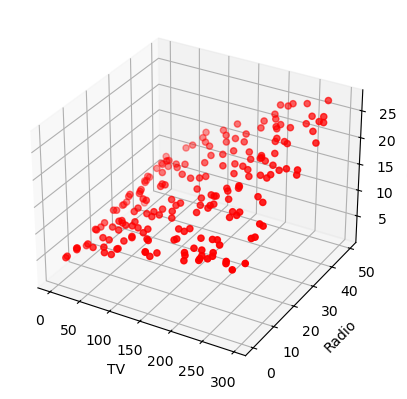

In [7]:
# Plot the 3D scatter plot of TV, Radio, and Sales
fig = plt.figure()                                                    # Create a figure
ax = fig.add_subplot(111, projection='3d')                            # Add a 3D subplot
ax.scatter(csv['TV'], csv['Radio'], csv['Sales'], c='r', marker='o')  # Scatter plot of TV, Radio, Sales data points

# Create a meshgrid for TV and Radio values
xx1, xx2 = np.meshgrid(
    np.linspace(csv['TV'].min(), csv['TV'].max(), num=10),       # TV values
    np.linspace(csv['Radio'].min(), csv['Radio'].max(), num=10)  # Radio values
)

# Prepare data for prediction (by converting to a DataFrame with appropriate column names)
XX = pd.DataFrame(np.column_stack([xx1.ravel(), xx2.ravel()]), columns=['TV', 'Radio'])  

# Predict sales based on the TV and Radio values
yy = lr.predict(XX)

# Plot the predicted surface
ax.plot_surface(xx1, xx2, yy.reshape(xx1.shape), color='None')

# Set axis labels
ax.set_xlabel('TV')     # Set label for TV axis
ax.set_ylabel('Radio')  # Set label for Radio axis
ax.set_zlabel('Sales')  # Set label for Sales axis

plt.show()              # Display the plot

# Overfitting

In statistics and machine learning, overfitting occurs when a statistical model describes random errors or noise instead of the underlying relationships.

The overfitting phenomenon has three main explanations: 

- excessively complex models
- multicollinearity
- high dimensionality

### Model complexity
Complex learners with too many parameters relative to the number of observations may overfit the training dataset.

### Multicollinearity
Predictors are highly correlated, meaning that one can be linearly predicted from the others. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data.

Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least not within the sample data set; it only affects computations regarding individual predictors. That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others. 

In case of perfect multicollinearity the predictor matrix is singular and therefore cannot be inverted. Under these circumstances, for a general linear model y = Xw+𝜀, the ordinary least-squares estimator, w𝑂𝐿𝑆 = (X𝑇 X)−1X𝑇 y, does not exist.

An example where correlated predictor may produce an unstable model follows:

In [11]:
bv = np.array([10, 20, 30, 40, 50])  # Business volume
tax = 0.2 * bv                       # 20% tax on business volume

# Business potential calculation
bp = 0.1 * bv + np.array([-0.1, 0.2, 0.1, -0.2, 0.1])  

# Combine business volume and tax as features
X = np.column_stack([bv, tax])

# True beta (solution)
beta_star = np.array([0.1, 0])  # True solution for business volume effect

'''
Since tax and bv are correlated, there is an infinite number of linear combinations
leading to the same prediction.
'''

# Define alternative beta solutions:
# 10 times the business volume and subtract 9 times the tax variable:
beta_medium = np.array([0.1 * 10, -0.1 * 9 * (1 / 0.2)])

# 100 times the business volume and subtract 99 times the tax variable:
beta_large = np.array([0.1 * 100, -0.1 * 99 * (1 / 0.2)])

# Check that all models lead to the same result using np.allclose for tolerance on floating-point comparisons
assert np.allclose(np.dot(X, beta_star), np.dot(X, beta_medium))  # Check that results match for beta_medium
assert np.allclose(np.dot(X, beta_star), np.dot(X, beta_large))   # Check that results match for beta_large

print("All assertions passed. The models produce the same result.")

All assertions passed. The models produce the same result.


This program demonstrates the concept of multicollinearity in linear regression, where two or more features (or independent variables) are highly correlated. In this case, the two features are business volume (bv) and tax, and they are linearly related since the tax is calculated as a fixed percentage (20%) of the business volume.

This demonstrates how multicollinearity allows for different coefficient values that can still lead to the same predictions, even though they have very different interpretations.

    * In beta_star, tax has no effect on the outcome.
    * In beta_medium and beta_large, tax has an indirect effect, but the models still produce the same results.

Multicollinearity's Impact:

- Interpretability: It becomes difficult to interpret the individual coefficients (e.g., how much impact business volume and tax have separately) because different coefficients lead to the same predictions.
- Model Stability: Small changes in the data can lead to large changes in the coefficient estimates when multicollinearity exists.

### Dealing with multicollinearity:

• Regularisation by e.g. ℓ2 shrinkage: Introduce a bias in the solution by making (𝑋𝑇 𝑋)−1
non-singular. See ℓ2 shrinkage.

• Feature selection: select a small number of features. See: Isabelle Guyon and André Elisseeff An introduction to variable and feature selection The Journal of Machine Learning Research, 2003.

• Feature selection: select a small number of features using ℓ1 shrinkage.

• Extract few independent (uncorrelated) features using e.g. principal components analysis (PCA), partial least squares regression (PLS-R) or regression methods that cut the number of predictors to a smaller set of uncorrelated components.

### High Dimensionality

High dimensions means a large number of input features. Linear predictor associate one parameter to each input feature, so a high-dimensional situation (𝑃 , number of features, is large) with a relatively small number of samples 𝑁 (so-called large 𝑃 small 𝑁 situation) generally lead to an overfit of the training data. Thus it is generally a bad idea to add many input features into the learner. This phenomenon is called the **curse of dimensionality**.

One of the most important criteria to use when choosing a learning algorithm is based on the relative size of 𝑃 and 𝑁.

In [16]:
def fit_on_increasing_size(model):
    """
    Fit a model on datasets with increasing feature size and evaluate its performance.

    Parameters:
    model: A machine learning model with .fit and .predict methods (e.g., LinearRegression).

    Returns:
    n_features_: Array of feature sizes.
    r2_train: Array of R-squared values for the training set.
    r2_test: Array of R-squared values for the test set.
    snr: Signal-to-noise ratios for each feature size.
    """
    
    n_samples = 100                       # Set the number of samples to 100
    n_features_ = np.arange(10, 800, 20)  # Define the range of feature sizes (10 to 780, step size 20)
    r2_train, r2_test, snr = [], [], []   # Initialize lists to store R^2 scores for train/test sets and SNR
    
    for n_features in n_features_:        # Loop through each feature size in the range

        # Sample the dataset (* 2 nb of samples)
        n_features_info = int(n_features / 10)          # Set the number of informative features (10% of total features)
        np.random.seed(42)                              # Set a random seed for reproducibility
        X = np.random.randn(n_samples * 2, n_features)  # Generate a dataset with random values for X
        beta = np.zeros(n_features)                     # Initialize the beta (coefficients) array with zeros
        beta[:n_features_info] = 1                      # Set the first `n_features_info` values of beta to 1 (informative features)
        Xbeta = np.dot(X, beta)                         # Compute the linear combination of X and beta (signal)
        eps = np.random.randn(n_samples * 2)            # Generate random noise
        y = Xbeta + eps                                 # Add noise to the signal to form the target variable y

        # Split the dataset into train and test sample
        Xtrain, Xtest = X[:n_samples, :], X[n_samples:, :]  # Split the dataset into training and testing sets
        ytrain, ytest = y[:n_samples], y[n_samples:]        # Split the target variable into training and testing sets

        # fit/predict
        lr = model.fit(Xtrain, ytrain)                           # Fit the model to the training data
        y_pred_train = lr.predict(Xtrain)                        # Predict the target for the training data
        y_pred_test = lr.predict(Xtest)                          # Predict the target for the testing data
        snr.append(Xbeta.std() / eps.std())                      # Calculate and append the signal-to-noise ratio (SNR)
        r2_train.append(metrics.r2_score(ytrain, y_pred_train))  # Calculate and append R^2 score for training data
        r2_test.append(metrics.r2_score(ytest, y_pred_test))     # Calculate and append R^2 score for testing data
        
    return n_features_, np.array(r2_train), np.array(r2_test), np.array(snr)  # Return the results as arrays

In [17]:
def plot_r2_snr(n_features_, r2_train, r2_test, xvline, snr, ax):         # Define function to plot r-squared and SNR
    """
    Two scales plot. Left y-axis: train test r-squared. Right y-axis SNR.
    """
    ax.plot(n_features_, r2_train, label="Train r-squared", linewidth=2)  # Plot train r-squared vs number of features
    ax.plot(n_features_, r2_test, label="Test r-squared", linewidth=2)    # Plot test r-squared vs number of features
    ax.axvline(x=xvline, linewidth=2, color='k', ls='--')                 # Vertical line at specific feature number
    ax.axhline(y=0, linewidth=1, color='k', ls='--')                      # Horizontal line at y=0
    ax.set_ylim(-0.2, 1.1)                                                # Set y-axis limits for r-squared
    ax.set_xlabel("Number of input features")                             # Set x-axis label
    ax.set_ylabel("r-squared")                                            # Set left y-axis label
    ax.legend(loc='best')                                                 # Add legend
    ax.set_title("Prediction perf.")                                      # Set plot title
    ax_right = ax.twinx()                                                 # Create a second y-axis for SNR
    ax_right.plot(n_features_, snr, 'r-', label="SNR", linewidth=1)       # Plot SNR vs number of features
    ax_right.set_ylabel("SNR", color='r')                                 # Set right y-axis label
    for tl in ax_right.get_yticklabels():                                 # Color right y-axis tick labels red
        tl.set_color('r')                                                 # Set color of the tick labels to red

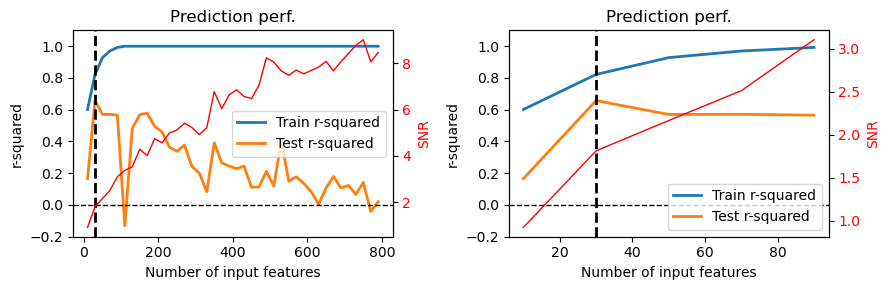

In [18]:
# Create a linear regression model
mod = lm.LinearRegression()  

# Fit models on dataset
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)  # Fit the model with increasing feature size
argmax = n_features[np.argmax(r2_test)]                                 # Find the feature size that maximizes the test r-squared

# plot
fig, axis = plt.subplots(1, 2, figsize=(9, 3))                          # Create two subplots for the plot

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])        # Plot r-squared and SNR for all features

# Right pane: Zoom on 100 first features
plot_r2_snr(n_features[n_features <= 100],                              # Plot only for the first 100 features
            r2_train[n_features <= 100], r2_test[n_features <= 100],    # r-squared values for train/test within 100 features
            argmax,                                                     # Mark the max test r-squared feature size
            snr[n_features <= 100],                                     # SNR values for the first 100 features
            axis[1])                                                    # Second subplot (right pane)

plt.tight_layout()                                                      # Adjust the layout to avoid overlap

Describe the datasets: 𝑁: nb_samples, 𝑃: nb_features

    n_samples = 100                        # Set the number of samples to 100
    n_features_ = np.arange(10, 800, 20)   # Define the range of feature sizes (10 to 780, step size 20)

What is n_features_info?

    n_features_info = int(n_features / 10) # Set the number of informative features (10% of total features)

Give the equation of the generative model.

    y = X β + ϵ

What is modified by the loop?

    Each iteration simulates a dataset with an increasing number of features and computes how the model performs in terms of training and testing 𝑅^2, as well as the signal-to-noise ratio.

What is the SNR?

    The Signal-to-Noise Ratio (SNR) is a measure that compares the level of the signal to the level of the noise in a dataset (snr.append(Xbeta.std() / eps.std()). Specifically, it quantifies how much information (signal) is present in relation to the random fluctuations (noise). A higher SNR means that the signal is strong compared to the noise, while a lower SNR indicates that the noise might be obscuring the signal. 

### Ridge Regression (ℓ2-regularization)

Regarding linear models, overfitting generally leads to excessively complex solutions (coefficient vectors), accounting for noise or spurious correlations within predictors. **Regularization** aims to alleviate this phenomenon by constraining (biasing or reducing) the capacity of the
learning algorithm in order to promote simple solutions. Regularization penalizes “large” solutions forcing the coefficients to be small, i.e. to shrink them toward zeros.

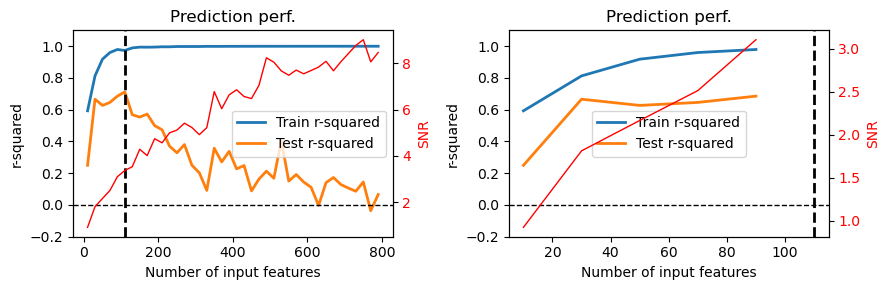

In [22]:
# lambda is alpha!        (In Ridge regression, the regularization parameter alpha is also called lambda)
mod = lm.Ridge(alpha=10)  # Initialize Ridge regression model with alpha = 10 (regularization strength)

# Fit models on dataset with increasing number of features
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)  # Get feature sizes, R^2 for train/test, and SNR

argmax = n_features[np.argmax(r2_test)]         # Find the number of features that gives the highest R^2 on the test set

# Plot results
fig, axis = plt.subplots(1, 2, figsize=(9, 3))  # Create a figure with two subplots

# Left pane: all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])  # Plot R^2 and SNR across all feature sizes

# Right pane: Zoom in on the first 100 features
plot_r2_snr(n_features[n_features <= 100],  # Filter for features <= 100
            r2_train[n_features <= 100],    # Corresponding R^2 for training set
            r2_test[n_features <= 100],     # Corresponding R^2 for test set
            argmax,                         # Mark the feature size with the highest R^2
            snr[n_features <= 100],         # Corresponding SNR values
            axis[1])                        # Plot on the second subplot

plt.tight_layout()  # Adjust layout to prevent overlapping of plots

#### What benefit has been obtained by using ℓ2 regularization?

The main benefit of using ℓ2 regularization (Ridge regression) is that it helps to reduce overfitting by penalizing large coefficients. Here’s how:

Bias-Variance Tradeoff:

- ℓ2 regularization adds a penalty to the size of the coefficients, shrinking them towards zero. This reduces the variance of the model but increases the bias slightly. The result is often a more generalized model that performs better on unseen data (lower overfitting).

Stability:

- Regularization can help stabilize the model, especially when dealing with multicollinearity (high correlations between features). By constraining the coefficients, ℓ2 regularization prevents over-reliance on any one feature.

Feature Selection:

- While Ridge regression doesn’t perform feature selection (unlike Lasso), it reduces the magnitude of less important features, making the model less sensitive to noise in the dataset.

Improved Test Set Performance:

- By controlling model complexity, ℓ2 regularization typically improves test set performance, as seen by an increase in the test R² score in your example with Ridge regression.

In summary, ℓ2 regularization (Ridge) helps build more robust and generalized models by preventing overfitting to training data, especially when there are many features or when features are correlated.

### Lasso Regression (ℓ1-regularization)

Lasso regression penalizes the coefficients by the ℓ1 norm. This constraint will reduce (bias) the capacity of the learning algorithm. To add such a penalty forces the coefficients to be small, i.e. it shrinks them toward zero. This penalty forces some coefficients to be exactly zero, providing a feature selection property.

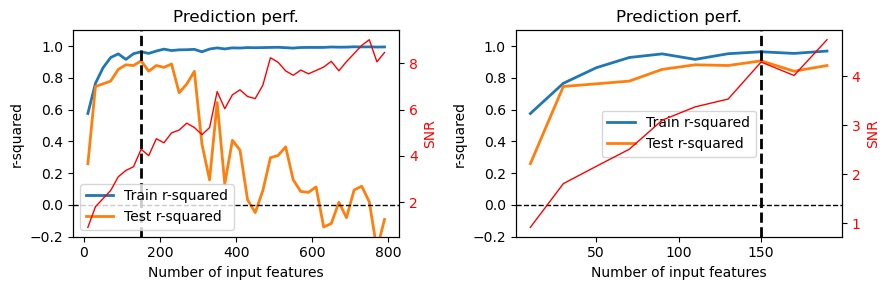

In [26]:
# lambda is alpha !
mod = lm.Lasso(alpha=.1)  # Initialize a Lasso model with regularization strength alpha set to 0.1

# Fit the Lasso model on datasets with increasing size and store R² scores and SNR
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)  

argmax = n_features[np.argmax(r2_test)]         # Identify the number of features where the test R² is maximized

# Plot the results
fig, axis = plt.subplots(1, 2, figsize=(9, 3))  # Create a figure with two subplots

# Left pane: Plot the R² and SNR for all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])  # Plot training R², test R², and SNR for all features

# Right pane: Zoom on the first 200 features
plot_r2_snr(n_features[n_features <= 200],              # Plot only for the first 200 features
            r2_train[n_features <= 200],                # Corresponding R² for training
            r2_test[n_features <= 200],                 # Corresponding R² for testing
            argmax,                                     # Highlight the feature count where R² is maximum
            snr[n_features <= 200],                     # Corresponding SNR values
            axis[1])                                    # Use the second subplot for this plot

plt.tight_layout()  # Adjust the layout to avoid overlapping of subplots

## Sparsity of the ℓ1 norm

### Occam’s razor

The principle can be interpreted as stating that among competing hypotheses, the one with the fewest assumptions should be selected.

Among possible models with similar loss, choose the simplest one:

• Choose the model with the smallest coefficient vector, i.e. smallest ℓ2 (‖w‖2) or ℓ1 (‖w‖1) norm of w, i.e. ℓ2 or ℓ1 penalty. See also bias-variance tradeoff.

• Choose the model that uses the smallest number of predictors. In other words, choose the model that has many predictors with zero weights. Two approaches are available to obtain this: 

    (i) Perform a feature selection as a preprocessing prior to applying the learning algorithm, or 
    (ii) embed the feature selection procedure within the learning process.

## Elastic-net regression (ℓ2-ℓ1-regularization)
The Elastic-net estimator combines the ℓ1 and ℓ2 penalties.

#### Rational

• **If there are groups of highly correlated variables, Lasso tends to arbitrarily select only one from each group. These models are difficult to interpret because covariates that are strongly associated with the outcome are not included in the predictive model. Conversely, the elastic net encourages a grouping effect, where strongly correlated predictors tend to be in or out of the model together.**

• Studies on real world data and simulation studies show that the elastic net often outperforms the lasso, while enjoying a similar sparsity of representation.

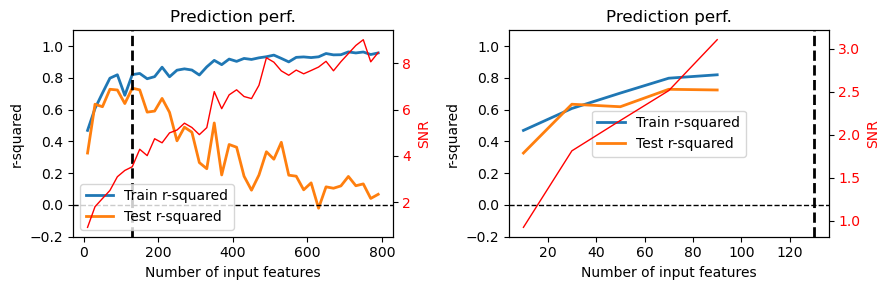

In [31]:
# Initialize ElasticNet with alpha (regularization strength) and l1_ratio (mix of L1 and L2 penalties)
mod = lm.ElasticNet(alpha=.5, l1_ratio=.5)  

# Fit models on datasets with increasing number of features
n_features, r2_train, r2_test, snr = fit_on_increasing_size(model=mod)  # Fit ElasticNet on datasets and store R² scores and SNR

argmax = n_features[np.argmax(r2_test)]         # Identify the number of features where the test R² is maximized

# Plot the results
fig, axis = plt.subplots(1, 2, figsize=(9, 3))  # Create a figure with two subplots

# Left pane: Plot R² and SNR for all features
plot_r2_snr(n_features, r2_train, r2_test, argmax, snr, axis[0])  # Plot R² and SNR for all features in the left pane

# Right pane: Zoom in on the first 100 features
plot_r2_snr(n_features[n_features <= 100],               # Plot only for the first 100 features
            r2_train[n_features <= 100],                 # Corresponding R² for training
            r2_test[n_features <= 100],                  # Corresponding R² for testing
            argmax,                                      # Highlight the feature count where R² is maximum
            snr[n_features <= 100],                      # Corresponding SNR values
            axis[1])                                     # Use the second subplot for this plot

plt.tight_layout()  # Adjust the layout to prevent overlap between subplots